In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math 
import time
import datetime
import operator
from sklearn.model_selection import RandomizedSearchCV , train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error , mean_absolute_error
plt.style.use('seaborn')
%matplotlib inline

In [2]:
confirmed_cases = pd.read_csv('C:/Jupyter/confirmed.csv')

In [3]:
deaths_reported = pd.read_csv('C:/Jupyter/deaths.csv')

In [4]:
recovered_cases = pd.read_csv('C:/Jupyter/recovered.csv')

In [5]:
confirmed_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,82,114,147,177,212,272,322,411,599,599.0
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,212,226,243,266,313,345,385,432,455,455.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,238,428,566,673,790,900,1030,1183,1306,1306.0


In [6]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,0,0,...,22,22,27,29,29,29,33,35,40,40.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,2.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,0,0,0,2,2,2,3,4,10,10.0


In [7]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,35,35,35,41,42,42,42,42,44,44.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,118,118,144,144,144,150,191,232,235,235.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,105,105,109,114,114,114,124,140,144,144.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,35,42,42,49,60,75,87,114,139,139.0


In [8]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20', '1/28/20', '1/29/20',
       '1/30/20', '1/31/20', '2/1/20', '2/2/20', '2/3/20', '2/4/20', '2/5/20',
       '2/6/20', '2/7/20', '2/8/20', '2/9/20', '2/10/20', '2/11/20', '2/12/20',
       '2/13/20', '2/14/20', '2/15/20', '2/16/20', '2/17/20', '2/18/20',
       '2/19/20', '2/20/20', '2/21/20', '2/22/20', '2/23/20', '2/24/20',
       '2/25/20', '2/26/20', '2/27/20', '2/28/20', '2/29/20', '3/1/20',
       '3/2/20', '3/3/20', '3/4/20', '3/5/20', '3/6/20', '3/7/20', '3/8/20',
       '3/9/20', '3/10/20', '3/11/20', '3/12/20', '3/13/20', '3/14/20',
       '3/15/20', '3/16/20', '3/17/20', '3/18/20', '3/19/20', '3/20/20',
       '3/21/20', '3/22/20', '3/23/20'],
      dtype='object')

In [9]:
confirmed = confirmed_cases.loc[:,cols[4]:cols[-1]]


In [10]:
deaths = deaths_reported.loc[:,cols[4]:cols[-1]]

In [11]:
recoveries = recovered_cases.loc[:,cols[4]:cols[-1]]

In [12]:
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,2,3,5,7,8,8,14,14,14,19,...,82,114,147,177,212,272,322,411,599,599.0
1,2,1,2,2,4,4,7,7,11,15,...,773,839,825,878,889,924,963,1007,1086,1086.0
2,0,1,3,3,4,5,7,7,10,13,...,212,226,243,266,313,345,385,432,455,455.0
3,0,0,0,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,2,2.0
4,0,0,0,3,4,4,4,7,8,8,...,238,428,566,673,790,900,1030,1183,1306,1306.0


In [13]:
dates = confirmed.keys()
world_cases = []
total_deaths=[]
mortality_rate =[]
total_recoveries = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    deaths_sum =deaths[i].sum()
    recoveries_sum =recoveries[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(deaths_sum)
    total_recoveries.append(recoveries_sum)

In [14]:
confirmed_sum

336004.0

In [15]:
recoveries_sum

98334.0

In [16]:
deaths_sum

14643.0

In [17]:
world_cases

[555,
 653,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30817,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76823,
 78579,
 78965,
 79568,
 80413,
 81395,
 82754,
 84120,
 86011,
 88369,
 90306,
 92840,
 95120,
 97882,
 101784,
 105821,
 109795,
 113561,
 118592,
 125865,
 128343,
 145193,
 156094,
 167446,
 181527,
 197142,
 214910,
 242708,
 272166,
 304524,
 335955,
 336004.0]

In [18]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recoveries = np.array(total_recoveries).reshape(-1,1)

In [19]:
days_since_1_22

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61]])

In [20]:
world_cases

array([[   555.],
       [   653.],
       [   941.],
       [  1434.],
       [  2118.],
       [  2927.],
       [  5578.],
       [  6166.],
       [  8234.],
       [  9927.],
       [ 12038.],
       [ 16787.],
       [ 19881.],
       [ 23892.],
       [ 27635.],
       [ 30817.],
       [ 34391.],
       [ 37120.],
       [ 40150.],
       [ 42762.],
       [ 44802.],
       [ 45221.],
       [ 60368.],
       [ 66885.],
       [ 69030.],
       [ 71224.],
       [ 73258.],
       [ 75136.],
       [ 75639.],
       [ 76197.],
       [ 76823.],
       [ 78579.],
       [ 78965.],
       [ 79568.],
       [ 80413.],
       [ 81395.],
       [ 82754.],
       [ 84120.],
       [ 86011.],
       [ 88369.],
       [ 90306.],
       [ 92840.],
       [ 95120.],
       [ 97882.],
       [101784.],
       [105821.],
       [109795.],
       [113561.],
       [118592.],
       [125865.],
       [128343.],
       [145193.],
       [156094.],
       [167446.],
       [181527.],
       [19

In [21]:
total_deaths

array([[   17.],
       [   18.],
       [   26.],
       [   42.],
       [   56.],
       [   82.],
       [  131.],
       [  133.],
       [  171.],
       [  213.],
       [  259.],
       [  362.],
       [  426.],
       [  492.],
       [  564.],
       [  634.],
       [  719.],
       [  806.],
       [  906.],
       [ 1013.],
       [ 1113.],
       [ 1118.],
       [ 1371.],
       [ 1523.],
       [ 1666.],
       [ 1770.],
       [ 1868.],
       [ 2007.],
       [ 2122.],
       [ 2247.],
       [ 2251.],
       [ 2458.],
       [ 2469.],
       [ 2629.],
       [ 2708.],
       [ 2770.],
       [ 2814.],
       [ 2872.],
       [ 2941.],
       [ 2996.],
       [ 3085.],
       [ 3160.],
       [ 3254.],
       [ 3348.],
       [ 3460.],
       [ 3558.],
       [ 3802.],
       [ 3988.],
       [ 4262.],
       [ 4615.],
       [ 4720.],
       [ 5404.],
       [ 5819.],
       [ 6440.],
       [ 7126.],
       [ 7905.],
       [ 8733.],
       [ 9867.],
       [11299.

In [22]:
total_recoveries

array([[2.8000e+01],
       [3.0000e+01],
       [3.6000e+01],
       [3.9000e+01],
       [5.2000e+01],
       [6.1000e+01],
       [1.0700e+02],
       [1.2600e+02],
       [1.4300e+02],
       [2.2200e+02],
       [2.8400e+02],
       [4.7200e+02],
       [6.2300e+02],
       [8.5200e+02],
       [1.1240e+03],
       [1.4870e+03],
       [2.0110e+03],
       [2.6160e+03],
       [3.2440e+03],
       [3.9460e+03],
       [4.6830e+03],
       [5.1500e+03],
       [6.2950e+03],
       [8.0580e+03],
       [9.3950e+03],
       [1.0865e+04],
       [1.2583e+04],
       [1.4352e+04],
       [1.6121e+04],
       [1.8177e+04],
       [1.8890e+04],
       [2.2886e+04],
       [2.3394e+04],
       [2.5227e+04],
       [2.7905e+04],
       [3.0384e+04],
       [3.3277e+04],
       [3.6711e+04],
       [3.9782e+04],
       [4.2716e+04],
       [4.5602e+04],
       [4.8228e+04],
       [5.1170e+04],
       [5.3796e+04],
       [5.5865e+04],
       [5.8358e+04],
       [6.0694e+04],
       [6.249

In [27]:
next_ten_days = 10
future_forecast = np.array([i for i in range(len(dates)+next_ten_days)]).reshape(-1,1)
new_dates = future_forecast[:-10]

In [28]:
future_forecast

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44],
       [45],
       [46],
       [47],
       [48],
       [49],
       [50],
       [51],
       [52],
       [53],
       [54],
       [55],
       [56],
       [57],
       [58],
       [59],
       [60],
       [61],
       [62],
       [63],
       [64],
       [65],
       [66],
       [67],
       [68],
       [69],
       [70],
       [71]])

In [33]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [34]:
latest_confirmed = confirmed_cases[dates[-1]]
latest_deaths = deaths_reported[dates[-1]]
latest_recoveries = recovered_cases[dates[-1]]

In [35]:
latest_confirmed

0       599.0
1      1086.0
2       455.0
3         2.0
4      1306.0
        ...  
496       0.0
497       0.0
498       0.0
499       0.0
500       0.0
Name: 3/23/20, Length: 501, dtype: float64

In [36]:
latest_recoveries

0       44.0
1      235.0
2      144.0
3        1.0
4      139.0
       ...  
496      0.0
497      0.0
498      0.0
499      0.0
500      0.0
Name: 3/23/20, Length: 501, dtype: float64

In [37]:
latest_deaths

0       1.0
1      40.0
2       2.0
3       0.0
4      10.0
       ... 
496     0.0
497     1.0
498     0.0
499     0.0
500     0.0
Name: 3/23/20, Length: 501, dtype: float64

In [38]:
unique_countries = list(confirmed_cases['Country/Region'].unique())
unique_countries

['Thailand',
 'Japan',
 'Singapore',
 'Nepal',
 'Malaysia',
 'Canada',
 'Australia',
 'Cambodia',
 'Sri Lanka',
 'Germany',
 'Finland',
 'United Arab Emirates',
 'Philippines',
 'India',
 'Italy',
 'Sweden',
 'Spain',
 'Belgium',
 'Egypt',
 'Lebanon',
 'Iraq',
 'Oman',
 'Afghanistan',
 'Bahrain',
 'Kuwait',
 'Algeria',
 'Croatia',
 'Switzerland',
 'Austria',
 'Israel',
 'Pakistan',
 'Brazil',
 'Georgia',
 'Greece',
 'North Macedonia',
 'Norway',
 'Romania',
 'Estonia',
 'San Marino',
 'Belarus',
 'Iceland',
 'Lithuania',
 'Mexico',
 'New Zealand',
 'Nigeria',
 'Ireland',
 'Luxembourg',
 'Monaco',
 'Qatar',
 'Ecuador',
 'Azerbaijan',
 'Armenia',
 'Dominican Republic',
 'Indonesia',
 'Portugal',
 'Andorra',
 'Latvia',
 'Morocco',
 'Saudi Arabia',
 'Senegal',
 'Argentina',
 'Chile',
 'Jordan',
 'Ukraine',
 'Hungary',
 'Liechtenstein',
 'Poland',
 'Tunisia',
 'Bosnia and Herzegovina',
 'Slovenia',
 'South Africa',
 'Bhutan',
 'Cameroon',
 'Colombia',
 'Costa Rica',
 'Peru',
 'Serbia',
 'Sl

In [45]:
country_confirmed_cases = []
no_cases = []
for i in unique_countries:
    cases = latest_confirmed[confirmed_cases['Country/Region']==i].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
unique_countries = [k for k,v in sorted(zip(unique_countries,country_confirmed_cases),key = operator.itemgetter(1),reverse =True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i]=latest_confirmed[confirmed_cases['Country/Region']==unique_countries[i]].sum()

In [47]:
print('Confirmed Cases by Countries/Regions:')
for i in range(len(unique_countries)):
    print(f'{unique_countries[i]}:{country_confirmed_cases[i]} cases')

Confirmed Cases by Countries/Regions:
China:81439.0 cases
Italy:59138.0 cases
US:33276.0 cases
Spain:28768.0 cases
Germany:24873.0 cases
Iran:21638.0 cases
France:16044.0 cases
Korea, South:8897.0 cases
Switzerland:7245.0 cases
United Kingdom:5741.0 cases
Netherlands:4216.0 cases
Belgium:3401.0 cases
Austria:3244.0 cases
Norway:2383.0 cases
Sweden:1934.0 cases
Portugal:1600.0 cases
Brazil:1593.0 cases
Denmark:1514.0 cases
Canada:1470.0 cases
Australia:1314.0 cases
Malaysia:1306.0 cases
Turkey:1236.0 cases
Czechia:1120.0 cases
Japan:1086.0 cases
Israel:1071.0 cases
Ireland:906.0 cases
Luxembourg:798.0 cases
Ecuador:789.0 cases
Pakistan:776.0 cases
Cruise Ship:712.0 cases
Poland:634.0 cases
Chile:632.0 cases
Finland:626.0 cases
Greece:624.0 cases
Thailand:599.0 cases
Iceland:568.0 cases
Indonesia:514.0 cases
Saudi Arabia:511.0 cases
Qatar:494.0 cases
Singapore:455.0 cases
Romania:433.0 cases
Slovenia:414.0 cases
India:396.0 cases
Philippines:380.0 cases
Russia:367.0 cases
Peru:363.0 case

In [48]:
unique_provinces = list(confirmed_cases['Province/State'].unique())
outliers = ['United Kingdom','Denmark','France']
for i in outliers:
    unique_provinces.remove(i)

In [50]:
province_confirmed_cases =[]
no_cases = []
for i in unique_provinces:
    cases = latest_confirmed[confirmed_cases['Province/State']==i].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_provinces.remove(i)

In [51]:
for i in range(len(unique_provinces)):
    print(f'{unique_provinces[i]}:{province_confirmed_cases[i]} cases')

British Columbia:424.0 cases
New South Wales:533.0 cases
Victoria:296.0 cases
Queensland:221.0 cases
South Australia:100.0 cases
Western Australia:120.0 cases
Tasmania:22.0 cases
Northern Territory:3.0 cases
Ontario:425.0 cases
Alberta:259.0 cases
Quebec:219.0 cases
Washington:1996.0 cases
New York:15793.0 cases
California:1642.0 cases
Massachusetts:646.0 cases
Diamond Princess:761.0 cases
Grand Princess:43.0 cases
Georgia:600.0 cases
Colorado:476.0 cases
Florida:830.0 cases
New Jersey:1914.0 cases
Oregon:161.0 cases
Texas:627.0 cases
Illinois:1049.0 cases
Pennsylvania:509.0 cases
Iowa:90.0 cases
Maryland:244.0 cases
North Carolina:302.0 cases
South Carolina:196.0 cases
Tennessee:505.0 cases
Virginia:221.0 cases
Arizona:152.0 cases
Indiana:201.0 cases
Kentucky:99.0 cases
District of Columbia:102.0 cases
Nevada:190.0 cases
New Hampshire:65.0 cases
Minnesota:169.0 cases
Nebraska:51.0 cases
Ohio:355.0 cases
Rhode Island:83.0 cases
Wisconsin:381.0 cases
Connecticut:223.0 cases
Hawaii:48.0 

In [52]:
nan_i =[]

for i in range(len(unique_provinces)):
    if type(unique_provinces[i])==float:
        nan_i.append(i)
unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)
for i in nan_i:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)

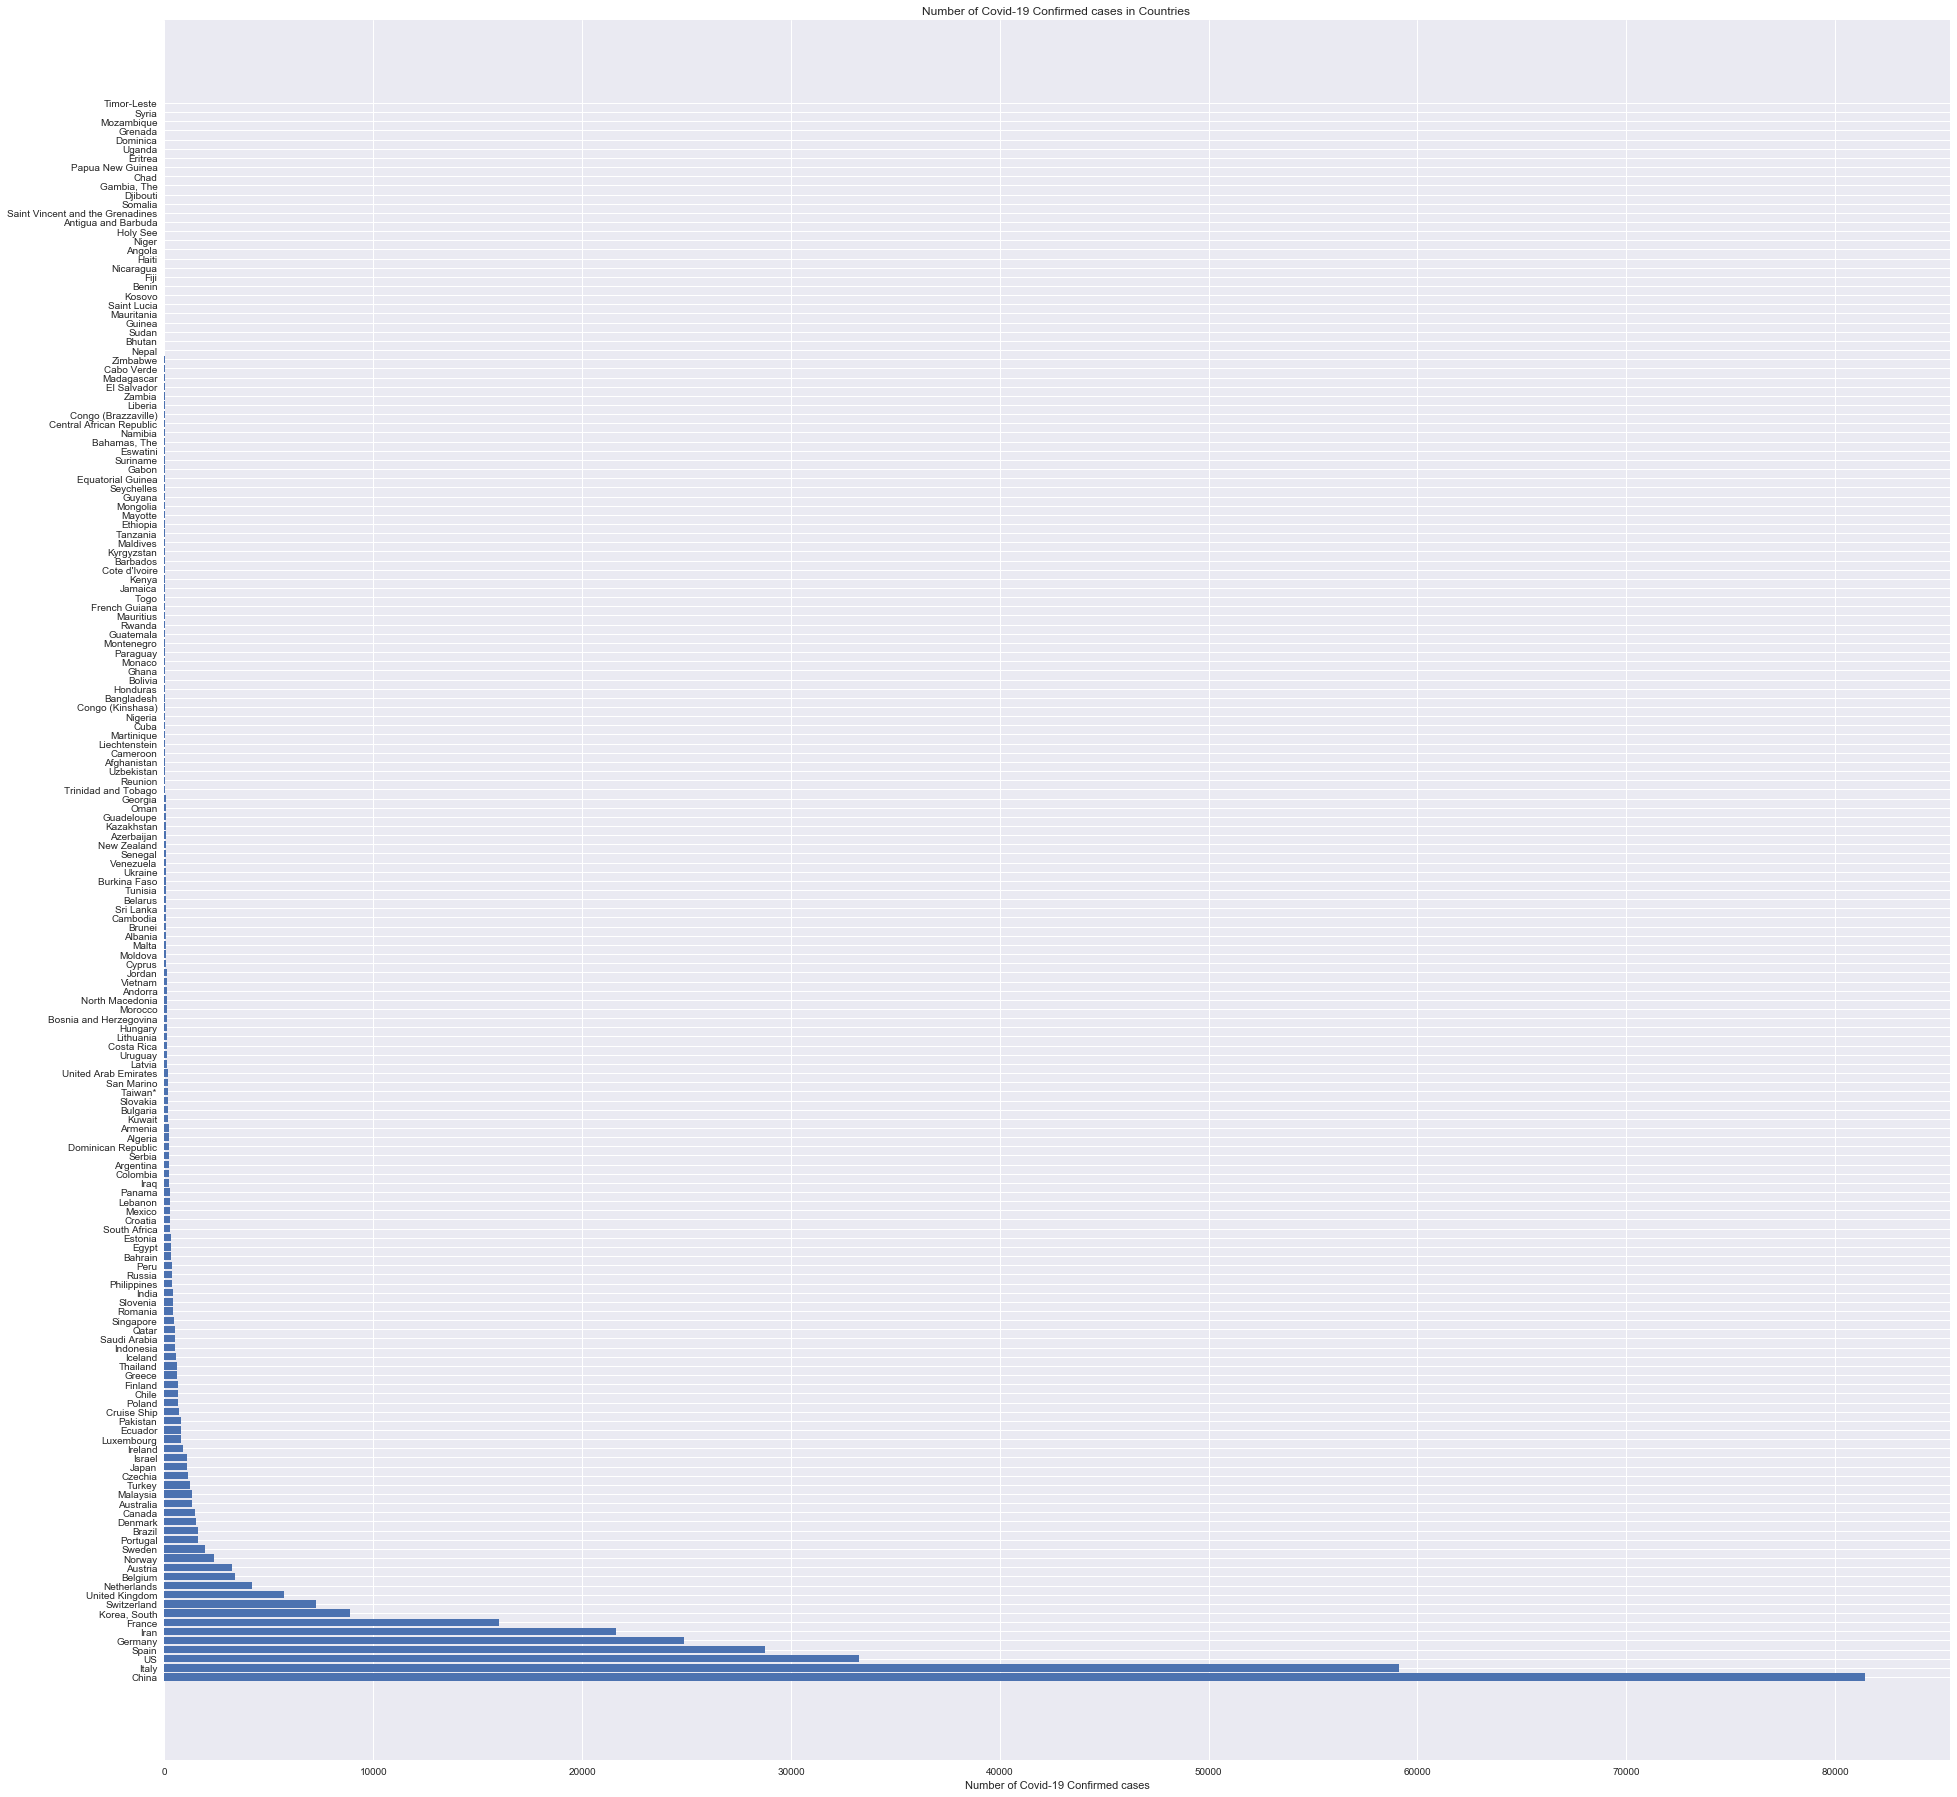

In [53]:
plt.figure(figsize=(32,32))
plt.barh(unique_countries,country_confirmed_cases)
plt.title('Number of Covid-19 Confirmed cases in Countries ')
plt.xlabel('Number of Covid-19 Confirmed cases')
plt.show()

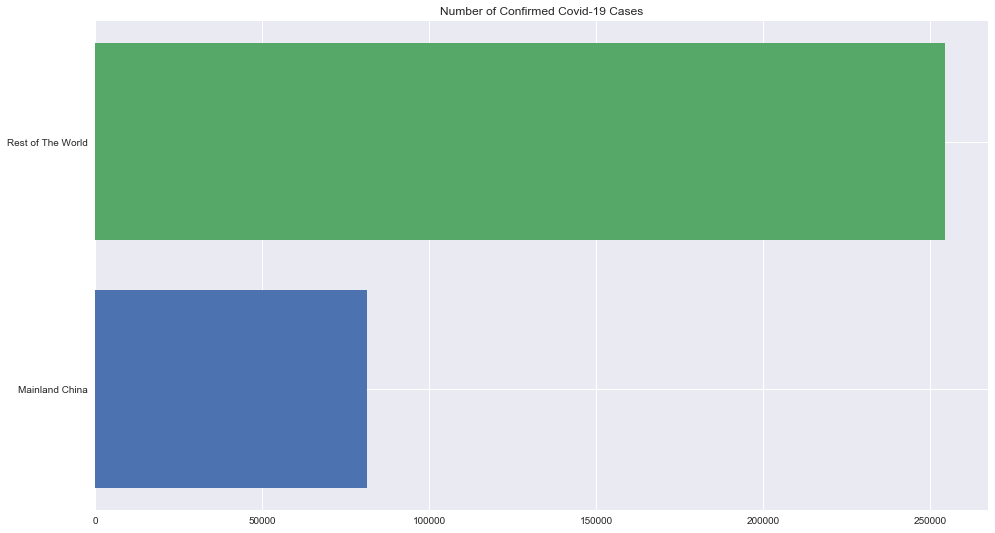

In [56]:
china_confirmed = latest_confirmed[confirmed_cases['Country/Region']=='China'].sum()
rest = np.sum(country_confirmed_cases)-china_confirmed
plt.figure(figsize=(16,9))
plt.barh('Mainland China',china_confirmed)
plt.barh('Rest of The World',rest)
plt.title('Number of Confirmed Covid-19 Cases')
plt.show()

In [57]:
print('Rest of The World : {} cases'.format(rest))
print('Mainland China : {} cases'.format(china_confirmed))
print('Total : {} cases'.format(china_confirmed+rest))

Rest of The World : 254565.0 cases
Mainland China : 81439.0 cases
Total : 336004.0 cases


In [70]:
visual_conf_cases = []
visual_uni_countries=[]
others = np.sum(country_confirmed_cases[10:])
for i in range(len(country_confirmed_cases[:10])):
    visual_uni_countries.append(unique_countries[i])
    visual_conf_cases.append(country_confirmed_cases[i])

visual_conf_cases.append(others)
visual_uni_countries.append('Others')

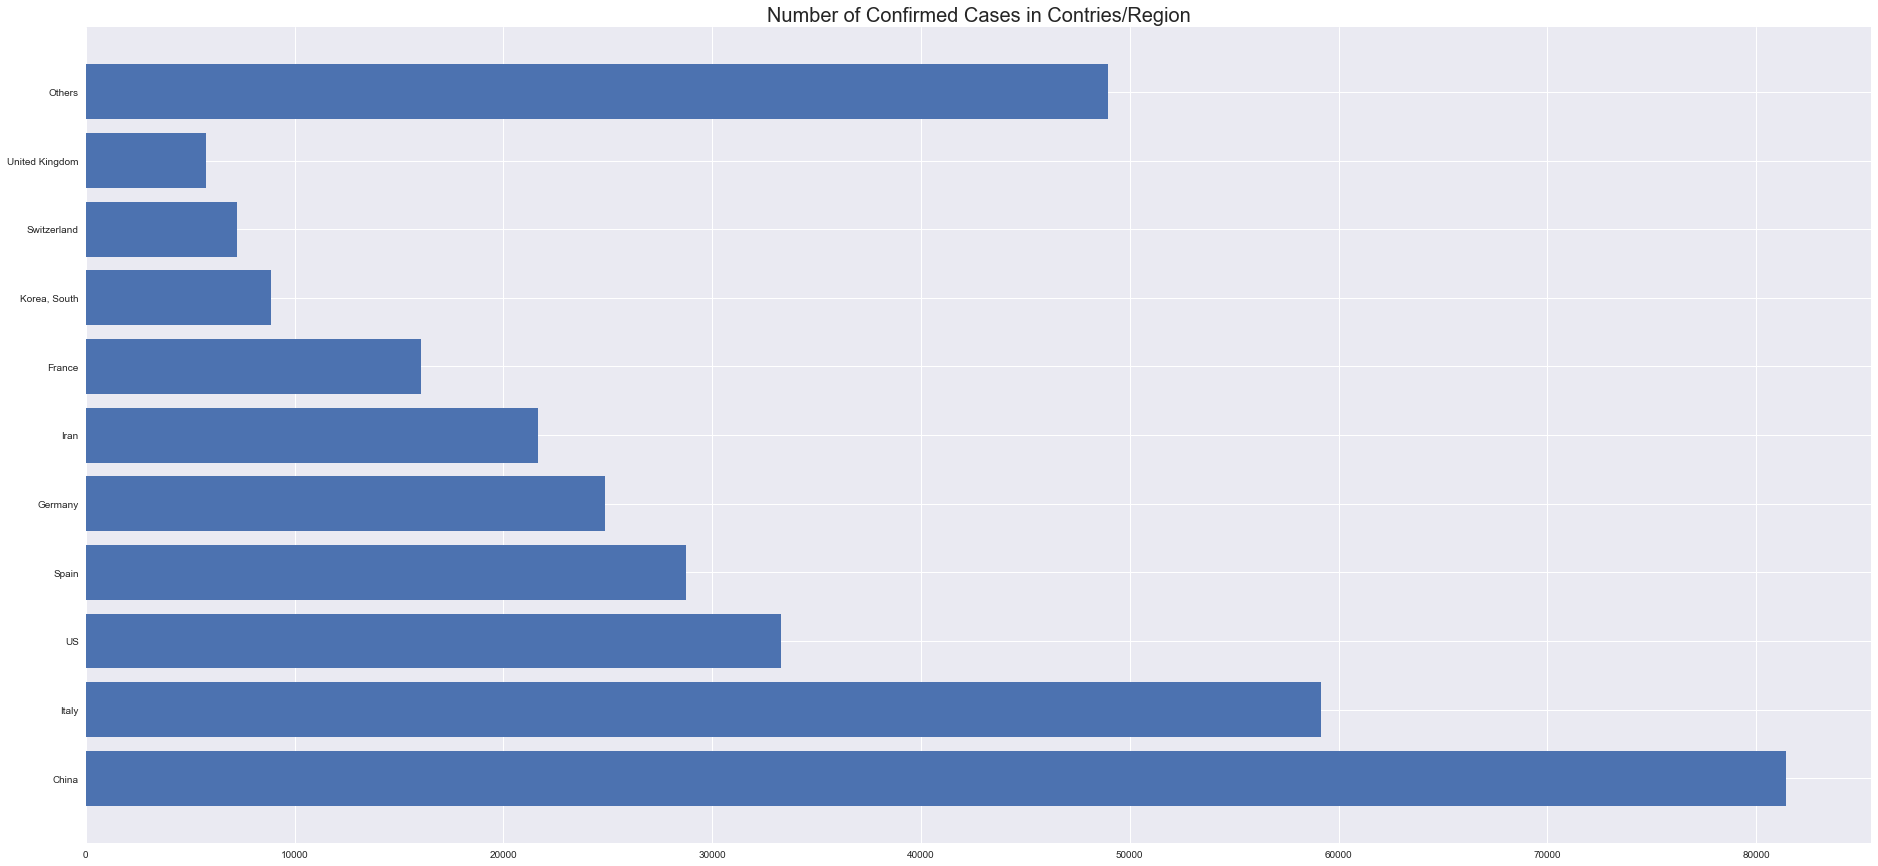

In [71]:
plt.figure(figsize=(32,15))
plt.barh(visual_uni_countries,visual_conf_cases)
plt.title('Number of Confirmed Cases in Contries/Region',size=20)
plt.show()

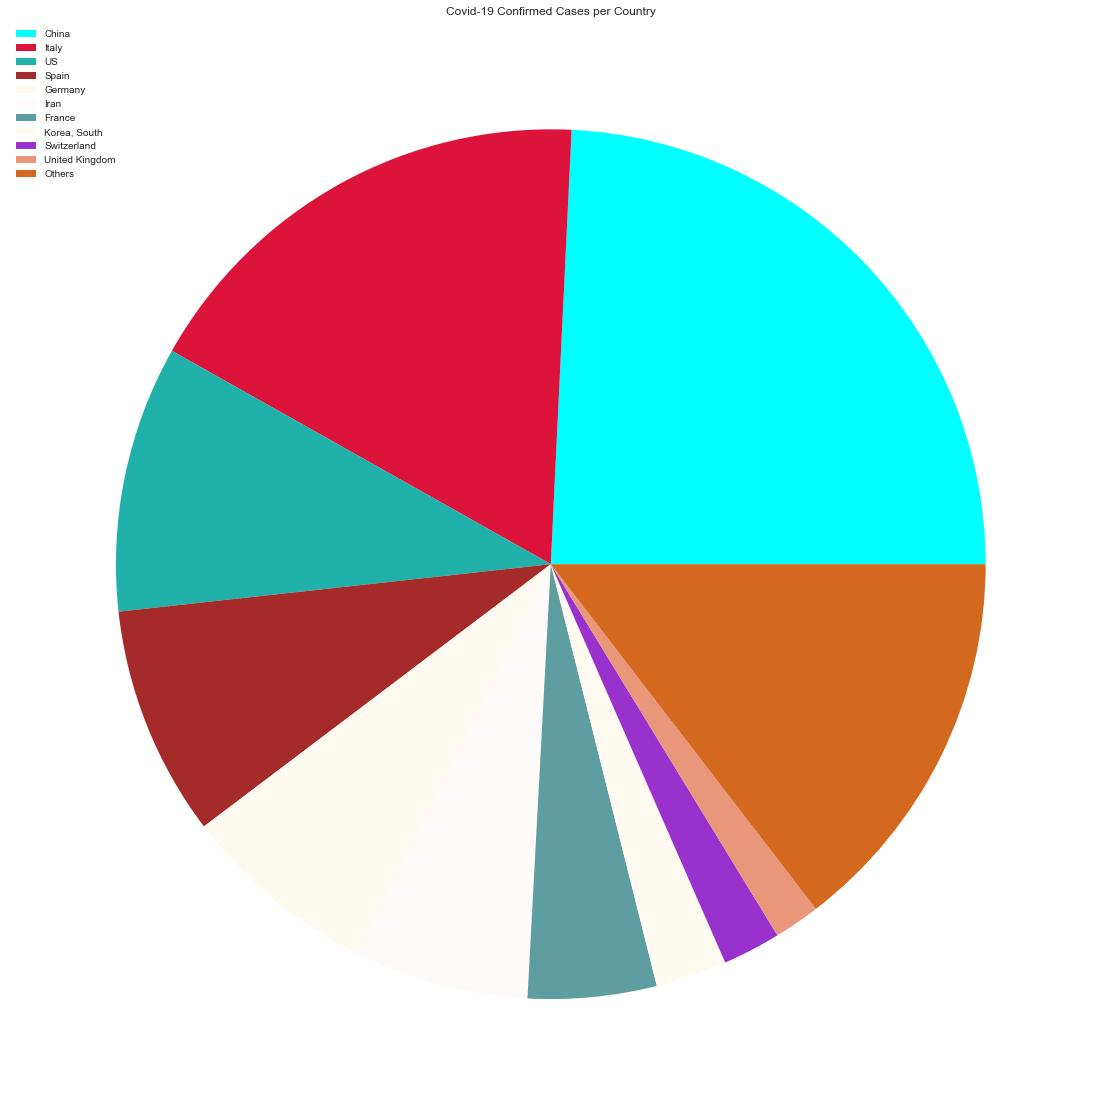

In [73]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k=len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Confirmed Cases per Country')
plt.pie(visual_conf_cases,colors=c)
plt.legend(visual_uni_countries,loc='best')
plt.show()

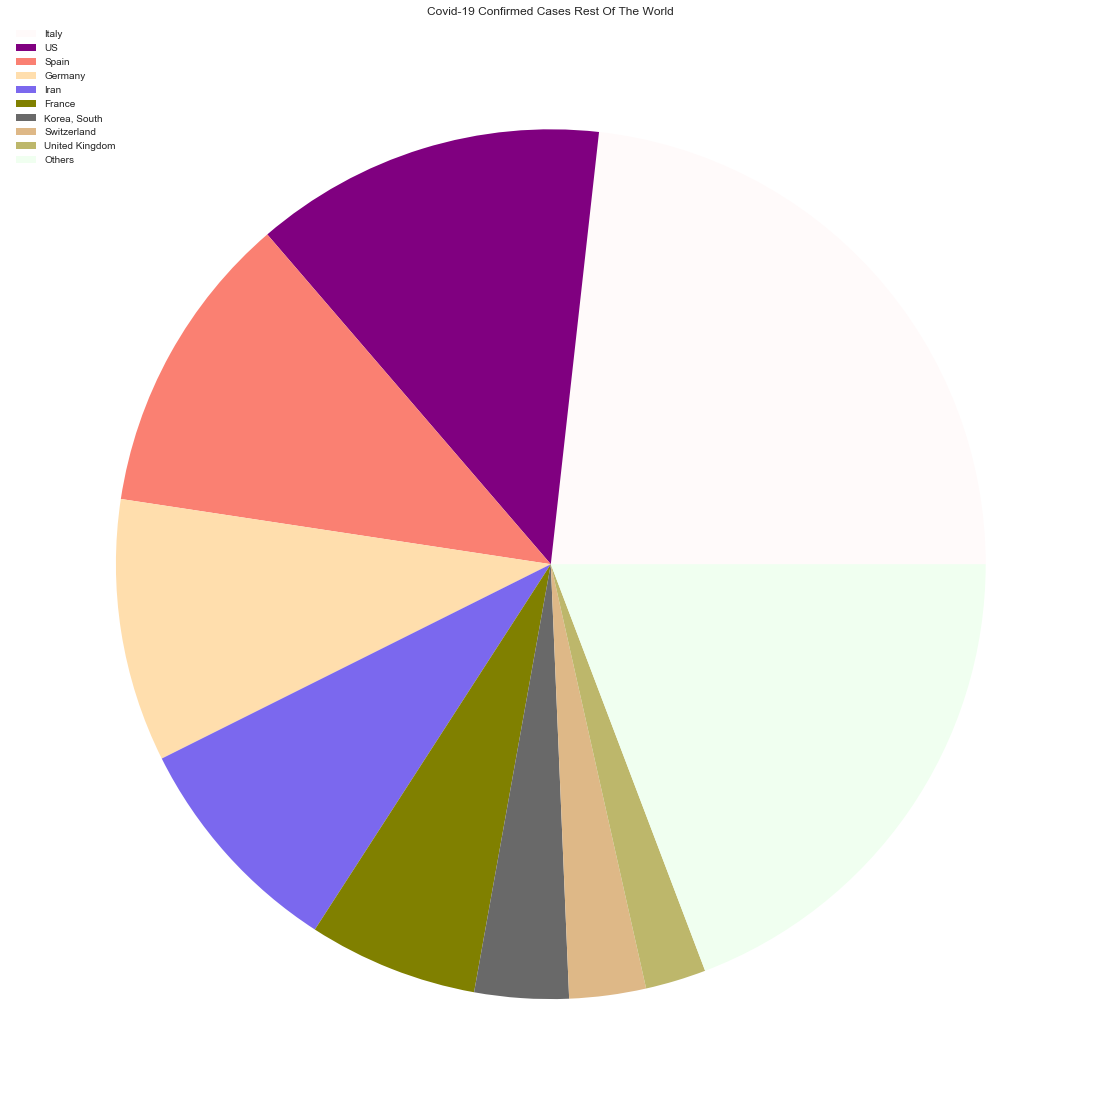

In [74]:
c = random.choices(list(mcolors.CSS4_COLORS.values()),k=len(unique_countries))
plt.figure(figsize=(20,20))
plt.title('Covid-19 Confirmed Cases Rest Of The World')
plt.pie(visual_conf_cases[1:],colors=c)
plt.legend(visual_uni_countries[1:],loc='best')
plt.show()

In [80]:
kernel = ['poly','sigmoid','rbf']
c = [0.01,0.1,1,10]
gamma = [0.01,0.1,1]
epsilon = [0.01,0.1,1]
shrinking = [True,False]
svm_grid = {'kernel':kernel,'C': c , 'gamma':gamma, 'epsilon':epsilon,'shrinking':shrinking}
X_train_confirmed,X_test_confirmed,y_train_confirmed,y_test_confirmed = train_test_split(days_since_1_22,world_cases,test_size=0.15,shuffle=False)
svm = SVR()
svm_search = RandomizedSearchCV(svm, svm_grid , scoring = 'neg_mean_squared_error',cv=3,return_train_score=True,n_jobs=-1,n_iter=40,verbose=1)
svm_search.fit(X_train_confirmed,y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    2.8s finished
C:\Users\prath\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='scale', kernel='rbf',
                                 max_iter=-1, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='deprecated', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [81]:
svm_search.best_params_

{'shrinking': True, 'kernel': 'poly', 'gamma': 0.01, 'epsilon': 0.1, 'C': 1}

In [82]:
svm_confirmed = svm_search.best_estimator_

In [83]:
svm_pred = svm_confirmed.predict(future_forecast)

In [84]:
svm_confirmed

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.01,
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [85]:
svm_pred

array([ 38929.61376268,  38930.34782345,  38935.48624888,  38949.43340362,
        38976.59365232,  39021.37135964,  39088.17089023,  39181.39660875,
        39305.45287984,  39464.74406817,  39663.67453839,  39906.64865515,
        40198.07078311,  40542.34528691,  40943.87653123,  41407.0688807 ,
        41936.32669999,  42536.05435374,  43210.65620662,  43964.53662328,
        44802.09996836,  45727.75060653,  46745.89290244,  47860.93122075,
        49077.2699261 ,  50399.31338316,  51831.46595657,  53378.13201099,
        55043.71591108,  56832.62202148,  58749.25470686,  60798.01833187,
        62983.31726116,  65309.55585939,  67781.1384912 ,  70402.46952127,
        73177.95331423,  76111.99423474,  79208.99664746,  82473.36491705,
        85909.50340815,  89521.81648542,  93314.70851352,  97292.58385709,
       101459.8468808 , 105820.9019493 , 110380.15342723, 115142.00567927,
       120110.86307005, 125291.12996424, 130687.21072649, 136303.50972145,
       142144.43131378, 1

Mean Absolute Error: 68494.7326137965
Mean Squared Error: 6689430372.144531


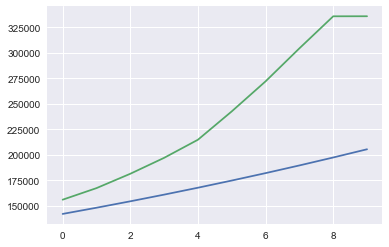

In [86]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred)
plt.plot(y_test_confirmed)
print('Mean Absolute Error:',mean_absolute_error(svm_test_pred,y_test_confirmed))
print('Mean Squared Error:',mean_squared_error(svm_test_pred,y_test_confirmed))

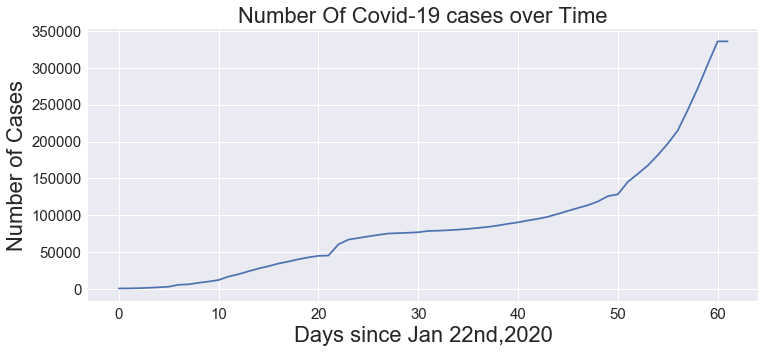

In [92]:
plt.figure(figsize=(12,5))
plt.plot(new_dates,world_cases)
plt.title('Number Of Covid-19 cases over Time',size =22)
plt.xlabel('Days since Jan 22nd,2020',size =22)
plt.ylabel('Number of Cases',size =22)
plt.xticks(size =15)
plt.yticks(size =15)
plt.show()

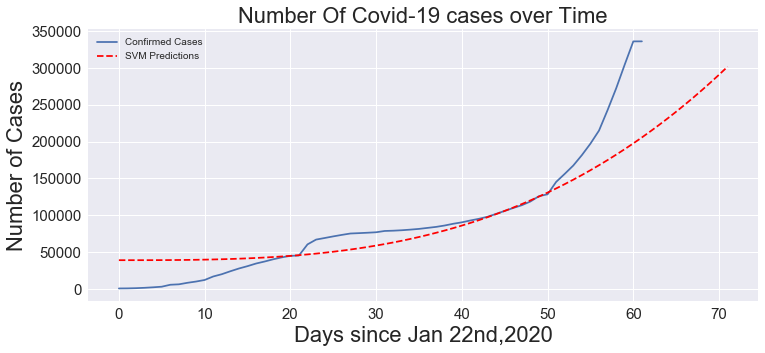

In [94]:
plt.figure(figsize=(12,5))
plt.plot(new_dates,world_cases)
plt.plot(future_forecast,svm_pred,linestyle='dashed',color='red')
plt.title('Number Of Covid-19 cases over Time',size =22)
plt.xlabel('Days since Jan 22nd,2020',size =22)
plt.ylabel('Number of Cases',size =22)
plt.legend(['Confirmed Cases','SVM Predictions'])
plt.xticks(size =15)
plt.yticks(size =15)
plt.show()



In [106]:
print('SVM Future Prediction:')
set(zip(future_forecast_dates[-10:],svm_pred[-10:]))

SVM Future Prediction:


{('03/24/2020', 213876.850316206),
 ('03/25/2020', 222479.30854675715),
 ('03/26/2020', 231359.24175052682),
 ('03/27/2020', 240521.05429216934),
 ('03/28/2020', 249969.15053633892),
 ('03/29/2020', 259707.93484768976),
 ('03/30/2020', 269741.8115908764),
 ('03/31/2020', 280075.18513055274),
 ('04/01/2020', 290712.4598313733),
 ('04/02/2020', 301658.0400579923)}

In [110]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression(normalize =True,fit_intercept = True)
linear_model.fit(X_train_confirmed,y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)

print('Mean Absolute Error:',mean_absolute_error(test_linear_pred,y_test_confirmed))
print('Mean Squared Error:',mean_squared_error(test_linear_pred,y_test_confirmed))

Mean Absolute Error: 99657.0911850081
Mean Squared Error: 13209797572.869415


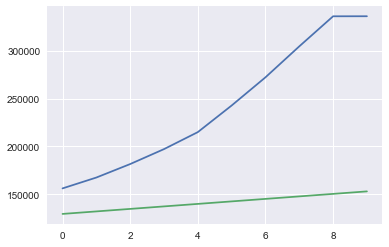

In [119]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)

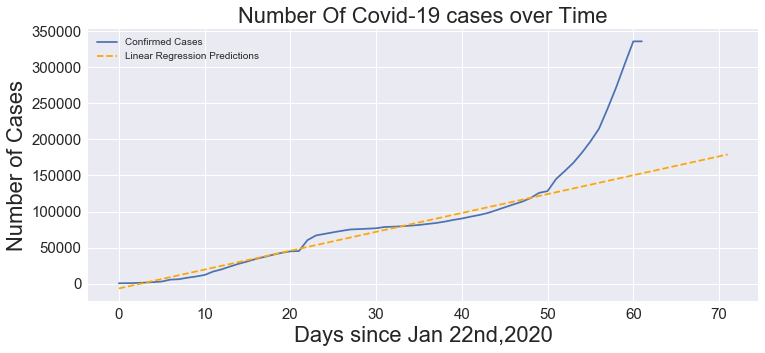

In [129]:
plt.figure(figsize=(12,5))
plt.plot(new_dates,world_cases)
plt.plot(future_forecast,linear_pred,linestyle='dashed',color='orange')
plt.title('Number Of Covid-19 cases over Time',size =22)
plt.xlabel('Days since Jan 22nd,2020',size =22)
plt.ylabel('Number of Cases',size =22)
plt.legend(['Confirmed Cases','Linear Regression Predictions'])
plt.xticks(size =15)
plt.yticks(size =15)
plt.show()

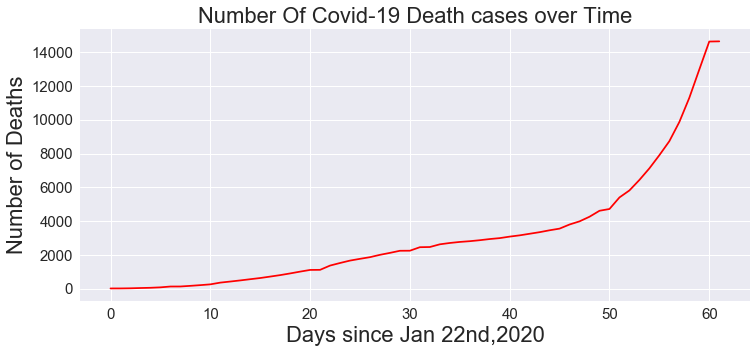

In [130]:
plt.figure(figsize=(12,5))
plt.plot(new_dates,total_deaths,color='red')
plt.title('Number Of Covid-19 Death cases over Time',size =22)
plt.xlabel('Days since Jan 22nd,2020',size =22)
plt.ylabel('Number of Deaths',size =22)
plt.xticks(size =15)
plt.yticks(size =15)
plt.show()

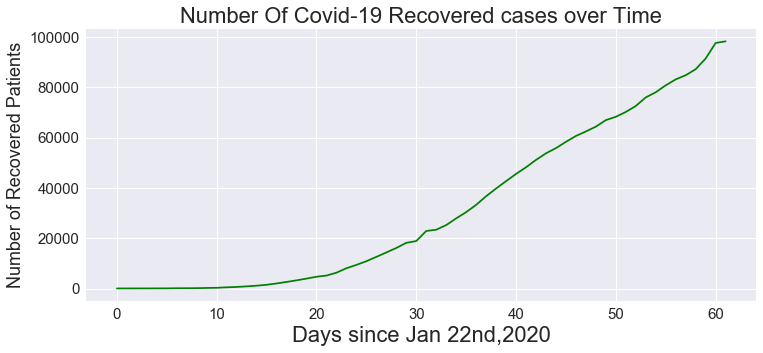

In [128]:
plt.figure(figsize=(12,5))
plt.plot(new_dates,total_recoveries,color='green')
plt.title('Number Of Covid-19 Recovered cases over Time',size =22)
plt.xlabel('Days since Jan 22nd,2020',size =22)
plt.ylabel('Number of Recovered Patients',size =18)
plt.xticks(size =15)
plt.yticks(size =15)
plt.show()

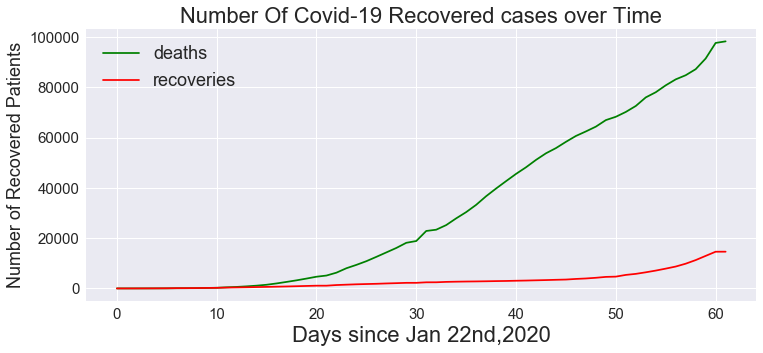

In [131]:
plt.figure(figsize=(12,5))
plt.plot(new_dates,total_recoveries,color='green')
plt.plot(new_dates,total_deaths,color='red')
plt.title('Number Of Covid-19 Recovered cases over Time',size =22)
plt.legend(['deaths','recoveries'],loc='best',fontsize=18)
plt.xlabel('Days since Jan 22nd,2020',size =22)
plt.ylabel('Number of Recovered Patients',size =18)
plt.xticks(size =15)
plt.yticks(size =15)
plt.show()